# Normality of Correlations
#### by Elizabeth Barnes

In [234]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import matplotlib.pyplot as plt
import importlib
import scipy.stats as stats

import general_functions as gf
importlib.reload(gf)
gf.add_parent_dir_to_path()

from lib import class_general_functions as cgf
importlib.reload(cgf)

#.............................................
# PLOTTING COMMANDS
#.............................................
gf.cc()
plt.ioff()

Let's first setup the easy parameter - the length of our samples. We can always change it later.

In [235]:
# sample size
N = 10

Here's the "magic". We loop through many instances and each time grab two samples of length N from a standard normal distribution (call them x and y). Then we correlation them (Pearson's r), and save the correlation.

In [236]:
r = np.empty((200000,))

print('looping through instances...')

for iloop, val in enumerate(r):
    x = np.random.normal(0.,1.,size = N)
    y = np.random.normal(0.,1.,size = N)
    
    r[iloop] = stats.pearsonr(x,y)[0]

looping through instances...


Let's look at our data, that is, the 10,000 correlations that we've collected.

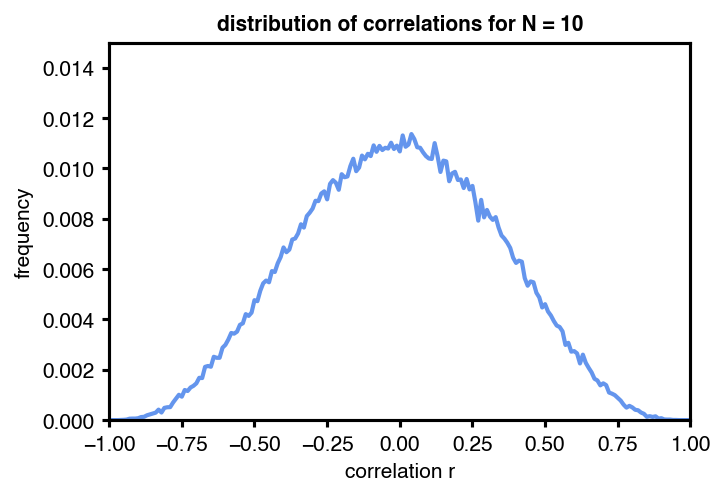

In [237]:
xinc= np.arange(-2.,2.,0.01)

fig1, ax1 = cgf.cfig(1)
hx = np.histogram(r,xinc)
plot_hx = hx[0]/float(np.size(r))
plt.plot(hx[1][:-1],plot_hx,'-',color='cornflowerblue', label = 'correlations')
 
plt.xlim(-1,1)
plt.ylim(0,.015)
plt.xlabel('correlation r')
plt.ylabel('frequency')
plt.title('distribution of correlations for N = ' + str(N))
fig1

Notice how correlations can be anywhere between 1 and -1, but these values only lie between about $\pm 0.25$. The reason is that our x and y are really not correlated (both random), so we expect the correlations we get out to be small and centered around zero.

Let's add a standard normal to compare.

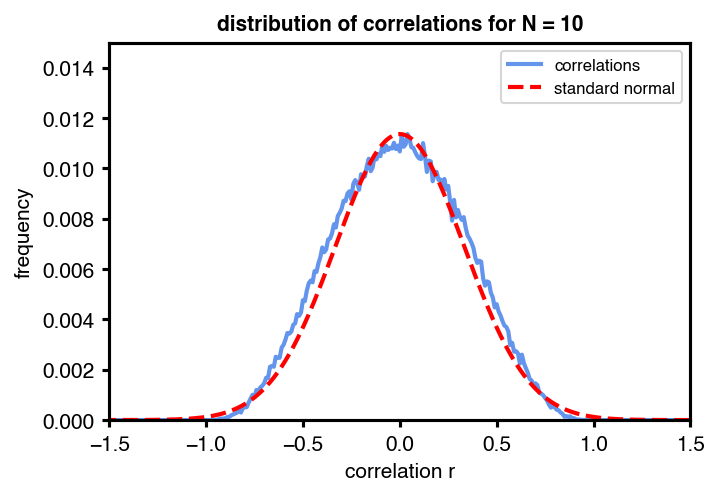

In [238]:
plt.xlim(-1.5,1.5)

f = stats.norm.pdf(xinc, loc = 0.0,scale = np.std(r))
plt.plot(xinc,(f/np.max(f))*np.max(plot_hx),'--r', label = 'standard normal')

plt.legend(fontsize = 8)

fig1


Now we have added a dashed red curve to represent a normal distribution with a zero mean and the same standard deviation as our correlations. While the fit looks ok - it is important to remember that the blue curve _is not normal_ since it cannot exceed -1 or 1, while the red curve can. So don't be fooled! However, we can transform our correlations to take these limitations into account...

Now, let's also transform these correlations into a t-statistic. Let's call this transformed correlation (now a t-statistic) "tr".

In [239]:
tr = (r * np.sqrt(N-2))/(np.sqrt(1-r**2))    

So - are the "tr" values actually distributed according the a t-statistic? One way to get a feel for this is to count how many tr values lie about the true t-distribution 97.5th percentile (for example). If the answer is 2.5%, then perhaps this works!

In [242]:
j = np.where(tr>=stats.t.ppf(0.975,N-2))
a = np.size(j)/float(np.size(tr))

print('--------------------------------------------------------------------------------')
print('N = ' + str(N) + ': t-distribution (theoretical) = 2.5%, Actual (data) = ' + str(gf.round_to_nearest(a,.001)*100.) + '%')
print('--------------------------------------------------------------------------------')

--------------------------------------------------------------------------------
N = 10: t-distribution (theoretical) = 2.5%, Actual (data) = 2.5%
--------------------------------------------------------------------------------


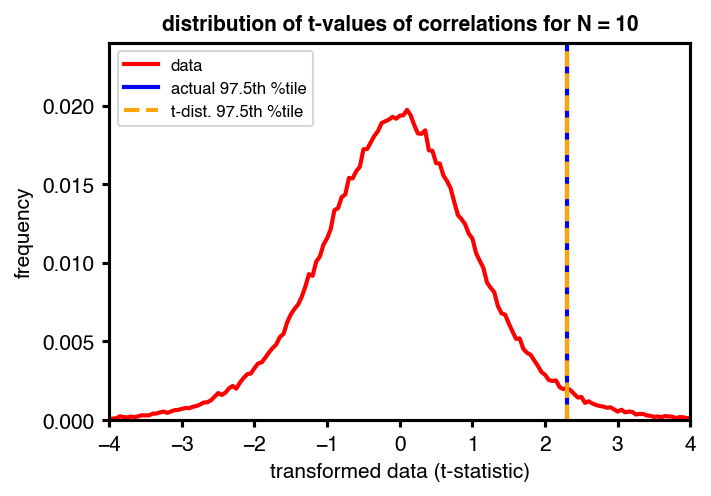

In [243]:
xinc= np.arange(-5.,5.,0.05)

fig2, ax2 = cgf.cfig(2)

hx = np.histogram(tr,xinc)
plt.plot(hx[1][:-1],hx[0]/float(np.size(tr)),'-',color='red', label = 'data')

plt.plot(np.ones((2,1))*np.percentile(tr,97.5),[0.0, 0.1],'-b', label = 'actual 97.5th %tile')
plt.plot(np.ones((2,1))*stats.t.ppf(0.975,N-2),[0.0, 0.1],'--',color = 'orange', label = 't-dist. 97.5th %tile')

plt.xlabel('transformed data (t-statistic)')
plt.ylabel('frequency')

plt.xlim(-4,4)
plt.ylim(0.0,0.024)

plt.title('distribution of t-values of correlations for N = ' + str(N))

plt.legend(loc = 'upper left', fontsize = 8)
fig2

So - the transform correlations behave just like t-distribution! Hence, we can do our statistical tests using this!